In [1]:
import sys
import os
import matplotlib.pyplot as plt
import time
import torch
import torchvision
import numpy as np
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision.transforms.functional import to_pil_image
from PIL import Image
from tqdm.notebook import tqdm

sys.path.insert(0, os.path.expanduser('~/openandn'))
device = 'cuda:2'
random_seed = 1
torch.manual_seed(random_seed)
np.random.seed(random_seed)
torch.backends.cudnn.enabled = True

# MNIST preparation

#### For sparse input use following:

In [4]:
from andn.util.sparsify import NearestPointSparsifier
mnist_dataset_dir = 'mnist'

intensity_levels_dim_h = 4
intensity_levels_dim_w = 4
input_modules_distribution = torch.tensor([[1, 1, 2, 2], [2, 3, 3, 3], [3, 4, 4, 4], [4, 4, 4, 4]], dtype=torch.int32)
treat_zero_as_zero = False
sparsify_transform = NearestPointSparsifier(
    n_channels=-1,
    per_pixel_modules_distribution=input_modules_distribution,
    sparsifying_rules=[
        (0, 1, [1.0], False),
        (0, 2, [1.0 / 2, 1.0], False),
        (0, 3, [1.0 / 3, 2.0 / 3, 1.0], False),
        (0, 4, [1.0 / 6, 2.0 / 6, 3.0 / 6, 4.0 / 6, 5.0 / 6, 1.0], False)
    ]
)

input_modules_shape = (intensity_levels_dim_h, intensity_levels_dim_w)

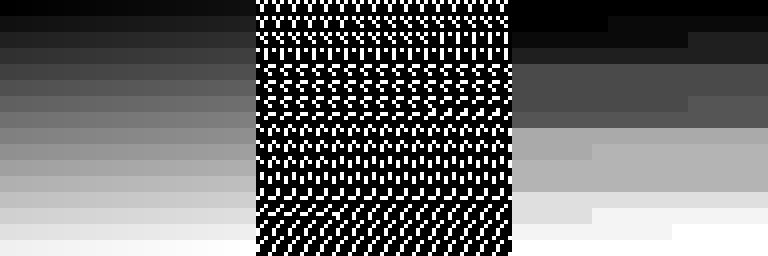

In [5]:
from andn.util.sparsify import prepare_sparsify_transform_and_input_modules_distribution

gradient_example = torch.arange(256).reshape(16, 16) / 255
sparsified_gradient_example = sparsify_transform(gradient_example.unsqueeze(0))
reverse_gradient = sparsify_transform.reverse(sparsified_gradient_example)
gradient_img = to_pil_image(gradient_example).resize([256, 256], Image.NEAREST)
sparse_gradient_img = to_pil_image(sparsified_gradient_example).resize([256, 256], Image.NEAREST)
reverse_gradient_img = to_pil_image(reverse_gradient).resize([256, 256], Image.NEAREST)
dst = Image.new('RGB', (768, 256))
dst.paste(gradient_img, (0, 0))
dst.paste(sparse_gradient_img, (256, 0))
dst.paste(reverse_gradient_img, (512, 0))
dst

In [2]:
#### For standard input use following:

In [3]:
intensity_levels_dim_h = 1
intensity_levels_dim_w = 1